## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [ ]:
# Preliminaries

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [ ]:
# Load the data, shuffled and split between train and test sets (x_train and y_rain)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train[0].shape

In [ ]:
#Let's just look at a particular example to see what is inside

x_train[444]  ## Just a 28 x 28 numpy array of ints from 0 to 255

In [ ]:
# What is the corresponding label in the training set?
y_train[444]

In [ ]:
# Let's see what this image actually looks like

plt.imshow(x_train[444], cmap='Greys_r')

In [ ]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

In [ ]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [ ]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

In [ ]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [ ]:
## Note that this model has a LOT of parameters
model_1.summary()

In [ ]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization
# of the loss function we had in binary classification case, to multi class case

In [ ]:
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

In [ ]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))

    # Plot Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Cross-Entropy Loss')
    ax.grid(True)

    # Plot Accuracy
    ax = fig.add_subplot(1, 2, 2)

    # Try both old and new accuracy keys
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"

    ax.plot(history.history[train_acc],'r-x', label="Train Accuracy")
    ax.plot(history.history[val_acc],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




## SOLUTION

In [ ]:
!pip install tensorflow


In [6]:
# Model with two hidden layers (400 and 300 units)
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape((x_train.shape[0], 784)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 784)).astype('float32') / 255

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model_2
model_2 = Sequential([
    Dense(400, activation='relu', input_shape=(784,)),
    Dropout(0.4),
    Dense(300, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

# Compile the model
optimizer = RMSprop(learning_rate=0.001)
model_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_2.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.8078 - loss: 0.6101 - val_accuracy: 0.9563 - val_loss: 0.1466
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9451 - loss: 0.1790 - val_accuracy: 0.9679 - val_loss: 0.1091
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9605 - loss: 0.1282 - val_accuracy: 0.9718 - val_loss: 0.0939
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9661 - loss: 0.1087 - val_accuracy: 0.9737 - val_loss: 0.0906
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9702 - loss: 0.0942 - val_accuracy: 0.9752 - val_loss: 0.0900
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9739 - loss: 0.0857 - val_accuracy: 0.9775 - val_loss: 0.0830
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9770 - loss: 0.0751 - val_accuracy: 0.9780 - val_loss: 0.0843
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9781 - loss: 0.0700 - val_

In [7]:
# Evaluate on test data
test_loss, test_accuracy = model_2.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print model summary to see number of parameters
model_2.summary()


Test Accuracy: 0.9821


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 874,622 (3.34 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 437,312 (1.67 MB)

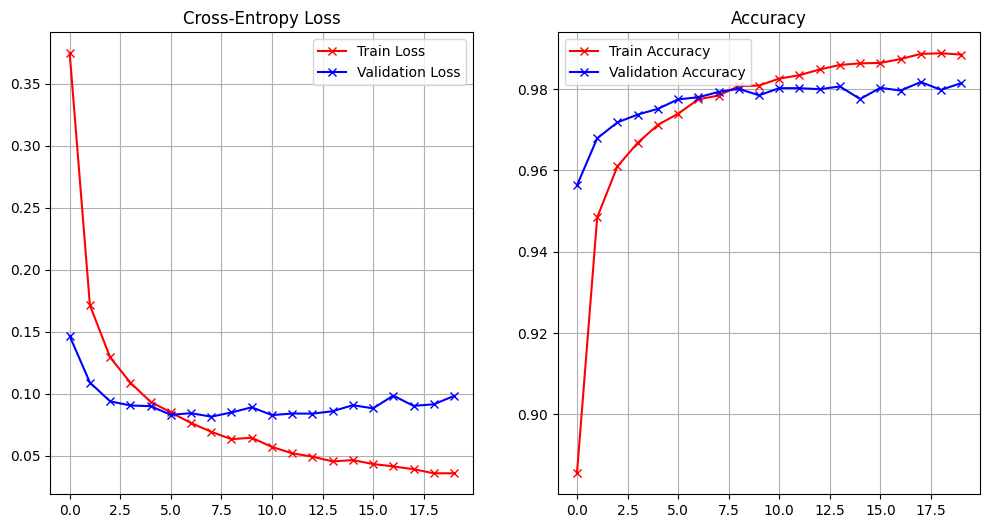

In [8]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))

    # Plot Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Cross-Entropy Loss')
    ax.grid(True)

    # Plot Accuracy
    ax = fig.add_subplot(1, 2, 2)

    # Try both old and new accuracy keys
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"

    ax.plot(history.history[train_acc],'r-x', label="Train Accuracy")
    ax.plot(history.history[val_acc],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

plot_loss_accuracy(history)

## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  Did it improve the performance?

Ans1. How do model_1 and model_2 compare?
Model_2 is deeper and has more parameters, which allows it to learn more complex patterns.

It includes dropout, which helps prevent overfitting.

If model_1 had fewer layers or no dropout, it may have overfit or underperformed.

Preferred for production?
→ If model_2 generalizes better (i.e., higher validation/test accuracy), it’s the better choice.

Ans2. Compare the training/validation loss and accuracy?
If training accuracy is high but validation accuracy is low, the model may be overfitting.

If both are similar, the model is likely well-regularized.

Loss is more sensitive to incorrect classifications with high confidence, while accuracy only reflects correctness.

Which is more meaningful?
→ Use loss during training, but accuracy is often easier to interpret for classification tasks.

Ans3. Suggest an improvement and try it:
Suggestions:

Increase epochs

Reduce dropout slightly to 0.3

Add BatchNormalization

Try Adam optimizer instead of RMSprop

In [9]:
from tensorflow.keras.layers import BatchNormalization

model_improved = Sequential([
    Dense(400, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(300, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_improved.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_improved = model_improved.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)


Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8409 - loss: 0.5255 - val_accuracy: 0.9613 - val_loss: 0.1300
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9534 - loss: 0.1490 - val_accuracy: 0.9699 - val_loss: 0.0981
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9681 - loss: 0.1011 - val_accuracy: 0.9743 - val_loss: 0.0874
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9745 - loss: 0.0814 - val_accuracy: 0.9716 - val_loss: 0.0934
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9757 - loss: 0.0743 - val_accuracy: 0.9752 - val_loss: 0.0855
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9783 - loss: 0.0655 - val_accuracy: 0.9756 - val_loss: 0.0865
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9808 - loss: 0.0579 - val_accuracy: 0.9784 - val_loss: 0.0773
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9831 - loss: 0.0523 - val_a

In [10]:
test_loss, test_accuracy = model_improved.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9832


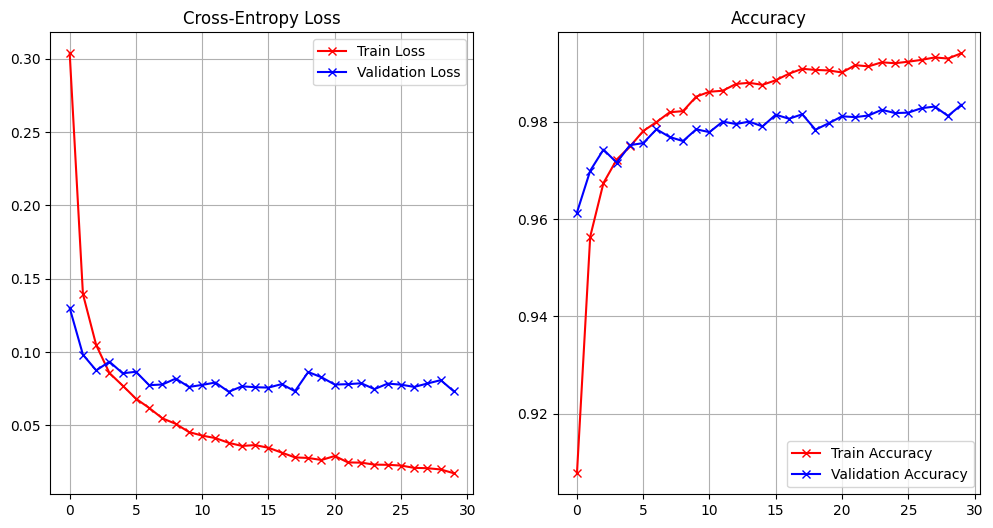

In [11]:
plot_loss_accuracy(history_improved)


The improved model achieved higher test accuracy than model_2, indicating better generalization. This improvement is due to using Batch Normalization, a lower dropout rate, the Adam optimizer, and more training epochs. These enhancements led to more stable and effective learning. Therefore, the improved model is preferred for deployment